In [42]:
import pandas as pd
import numpy as np

In [43]:
df=pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [44]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [45]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 2200 artists>

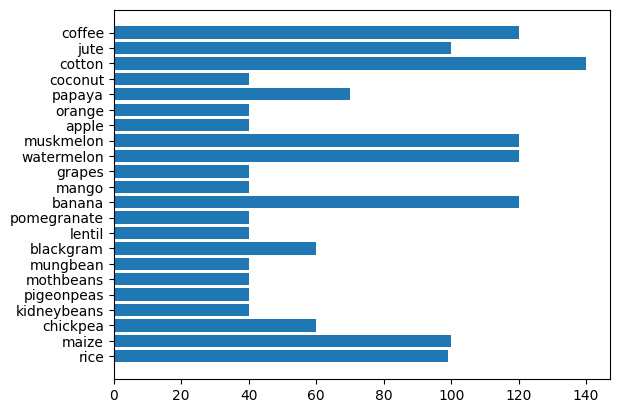

In [47]:
plt.barh(df['label'],df['N'])

<BarContainer object of 2200 artists>

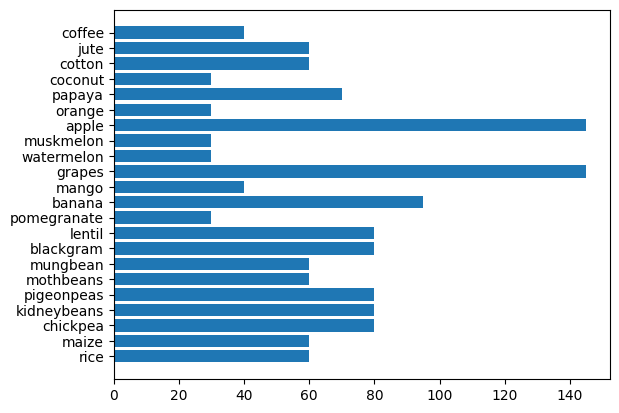

In [48]:
plt.barh(df['label'],df['P'])

<BarContainer object of 2200 artists>

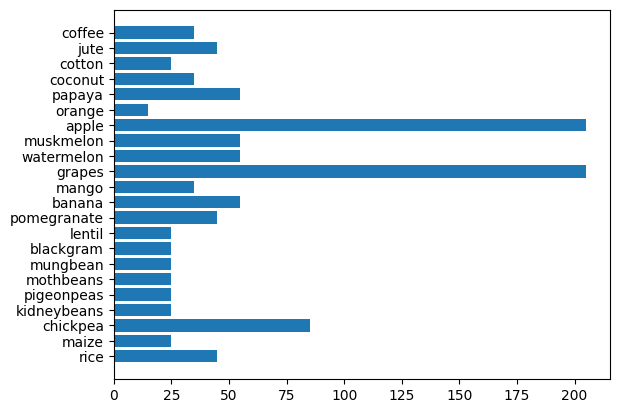

In [49]:
plt.barh(df['label'],df['K'])

<BarContainer object of 2200 artists>

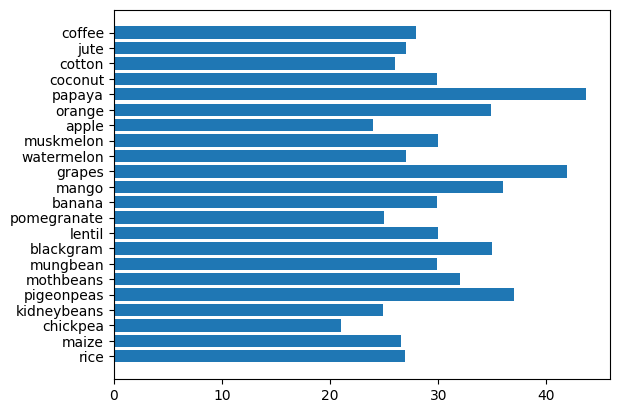

In [50]:
plt.barh(df['label'],df['temperature'])

<BarContainer object of 2200 artists>

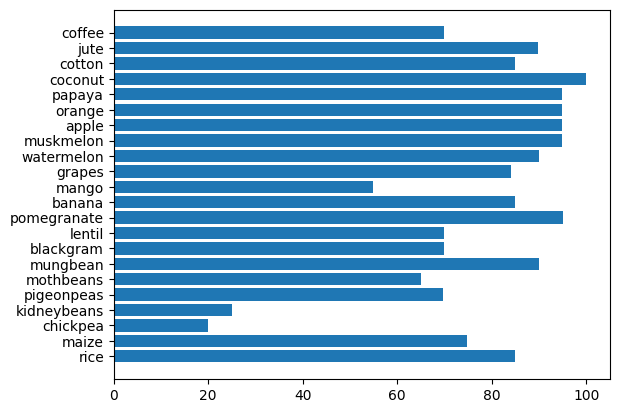

In [51]:
plt.barh(df['label'],df['humidity'])

<BarContainer object of 2200 artists>

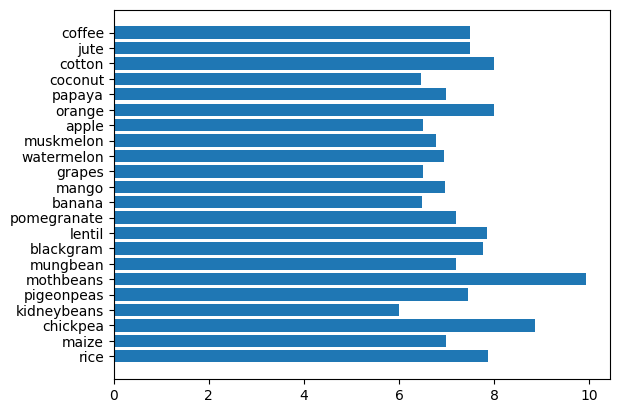

In [52]:
plt.barh(df['label'],df['ph'])

<BarContainer object of 2200 artists>

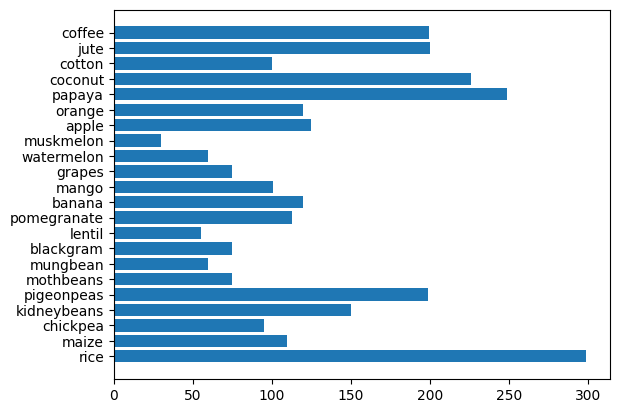

In [53]:
plt.barh(df['label'],df['rainfall'])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [55]:
feature_columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

features = df[feature_columns]
labels = df[["label"]]

In [56]:
train_X, test_X, train_y, test_y = train_test_split(
    features, labels,
    test_size=0.3,
    random_state=42,
    stratify=labels
)

In [57]:
train_X.shape

(1540, 7)

In [58]:
train_y.shape

(1540, 1)

In [59]:
test_X.shape

(660, 7)

In [60]:
test_y.shape

(660, 1)

In [61]:
models=[]
models.append(LogisticRegression())
models.append(DecisionTreeClassifier(criterion='gini', max_depth = 12, random_state = 42))
models.append(DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state = 42))
models.append(RandomForestClassifier(n_estimators=100))
models.append(KNeighborsClassifier(n_neighbors=3))
models.append(KNeighborsClassifier(n_neighbors=5))
models.append(KNeighborsClassifier(n_neighbors=7))
models.append(GaussianNB())
models.append(svm.SVC(kernel='rbf'))
models.append(svm.SVC(kernel='linear'))

In [62]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
def perform_cross_val(model):
    scores = cross_val_score(model, features, labels, cv=kfold)
    mean_score = round(scores.mean()*100, 3)
    
    print(scores)
    print(f"Average score after cross-validation is {mean_score}")

In [64]:
models

[LogisticRegression(),
 DecisionTreeClassifier(max_depth=12, random_state=42),
 DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42),
 RandomForestClassifier(),
 KNeighborsClassifier(n_neighbors=3),
 KNeighborsClassifier(),
 KNeighborsClassifier(n_neighbors=7),
 GaussianNB(),
 SVC(),
 SVC(kernel='linear')]

In [65]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
max_acc=0.0
for model in models:
    model.fit(train_X,train_y)
    predictions = model.predict(test_X)
    acc = accuracy_score(predictions, test_y)
    if acc>max_acc:
        max_acc=acc
        my_model=model
    print(str(model)+" -------- "+str(acc))   
    print()

LogisticRegression() -------- 0.9484848484848485

DecisionTreeClassifier(max_depth=12, random_state=42) -------- 0.9848484848484849

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42) -------- 0.9878787878787879

RandomForestClassifier() -------- 0.9939393939393939

KNeighborsClassifier(n_neighbors=3) -------- 0.9787878787878788

KNeighborsClassifier() -------- 0.9787878787878788

KNeighborsClassifier(n_neighbors=7) -------- 0.9818181818181818

GaussianNB() -------- 0.9924242424242424

SVC() -------- 0.9787878787878788

SVC(kernel='linear') -------- 0.9893939393939394



In [67]:
my_model

RandomForestClassifier()

In [68]:
for model in models:
    print("---------------------"+str(model)+"------------------")
    perform_cross_val(model)
    print()    

---------------------LogisticRegression()------------------
[0.94545455 0.96363636 0.96363636 0.95681818 0.97045455]
Average score after cross-validation is 96.0

---------------------DecisionTreeClassifier(max_depth=12, random_state=42)------------------
[0.98636364 0.97954545 0.99772727 0.98409091 0.98636364]
Average score after cross-validation is 98.682

---------------------DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)------------------
[0.97954545 0.97954545 0.98863636 0.99318182 0.98181818]
Average score after cross-validation is 98.455

---------------------RandomForestClassifier()------------------
[0.99318182 0.99090909 0.99772727 0.99772727 0.99772727]
Average score after cross-validation is 99.545

---------------------KNeighborsClassifier(n_neighbors=3)------------------
[0.97045455 0.98181818 0.98863636 0.98409091 0.98181818]
Average score after cross-validation is 98.136

---------------------KNeighborsClassifier()------------------
[0.970454

In [69]:
classes=df['label'].unique()
classes

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [70]:
def plot_confusion_matrix(model):
    y_pred = cross_val_predict(model, features, labels, cv=kfold)
    
    matrix = confusion_matrix(labels, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix, 
                annot=True, 
                fmt='.0f', 
                annot_kws={'fontsize': 8}, 
                xticklabels=classes, 
                yticklabels=classes)
    plt.tight_layout()
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

-------------------LogisticRegression()------------------------


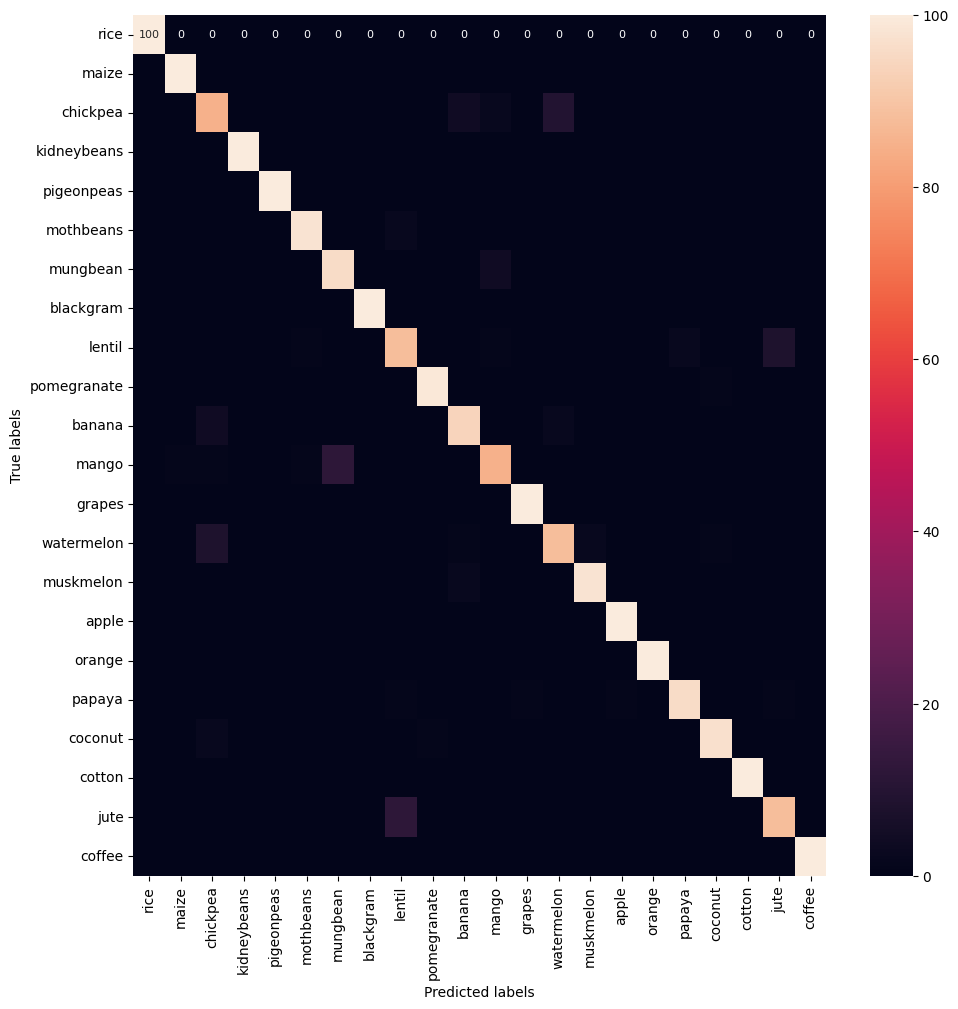

----------------------------------------------------------

-------------------DecisionTreeClassifier(max_depth=12, random_state=42)------------------------


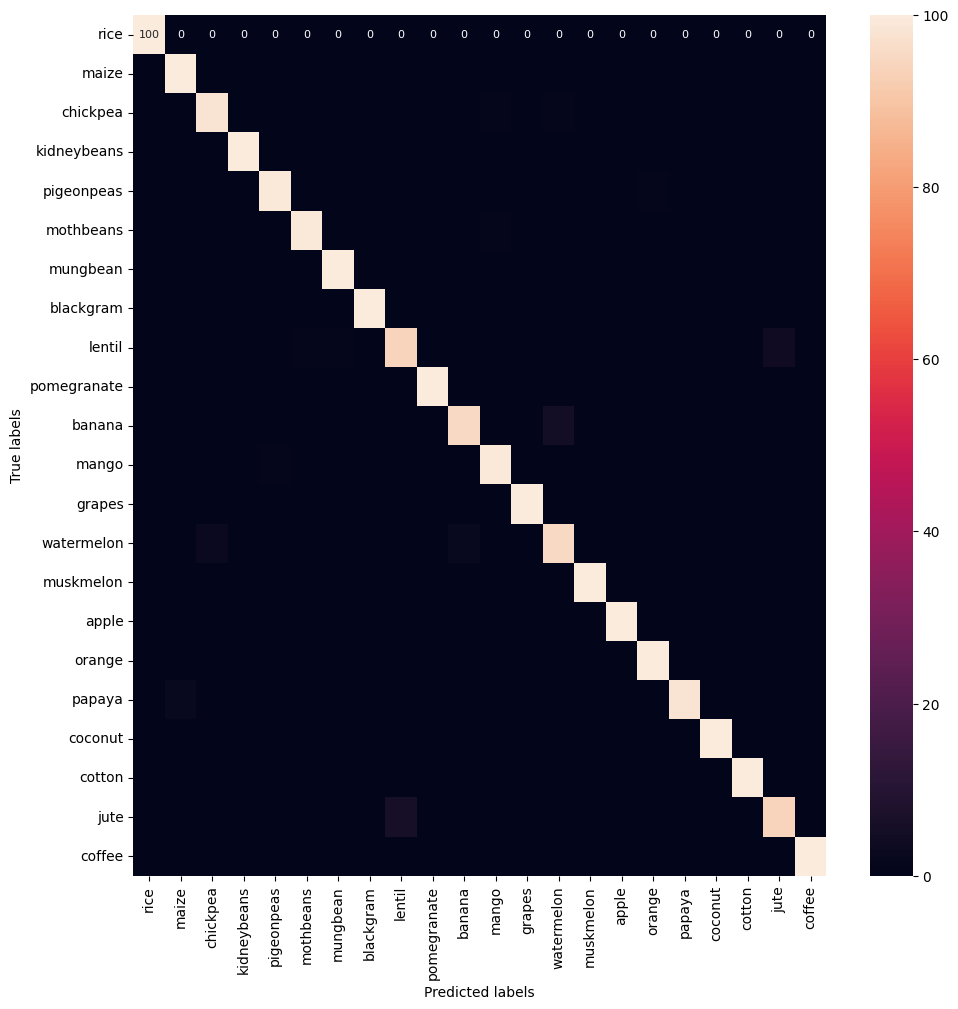

----------------------------------------------------------

-------------------DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)------------------------


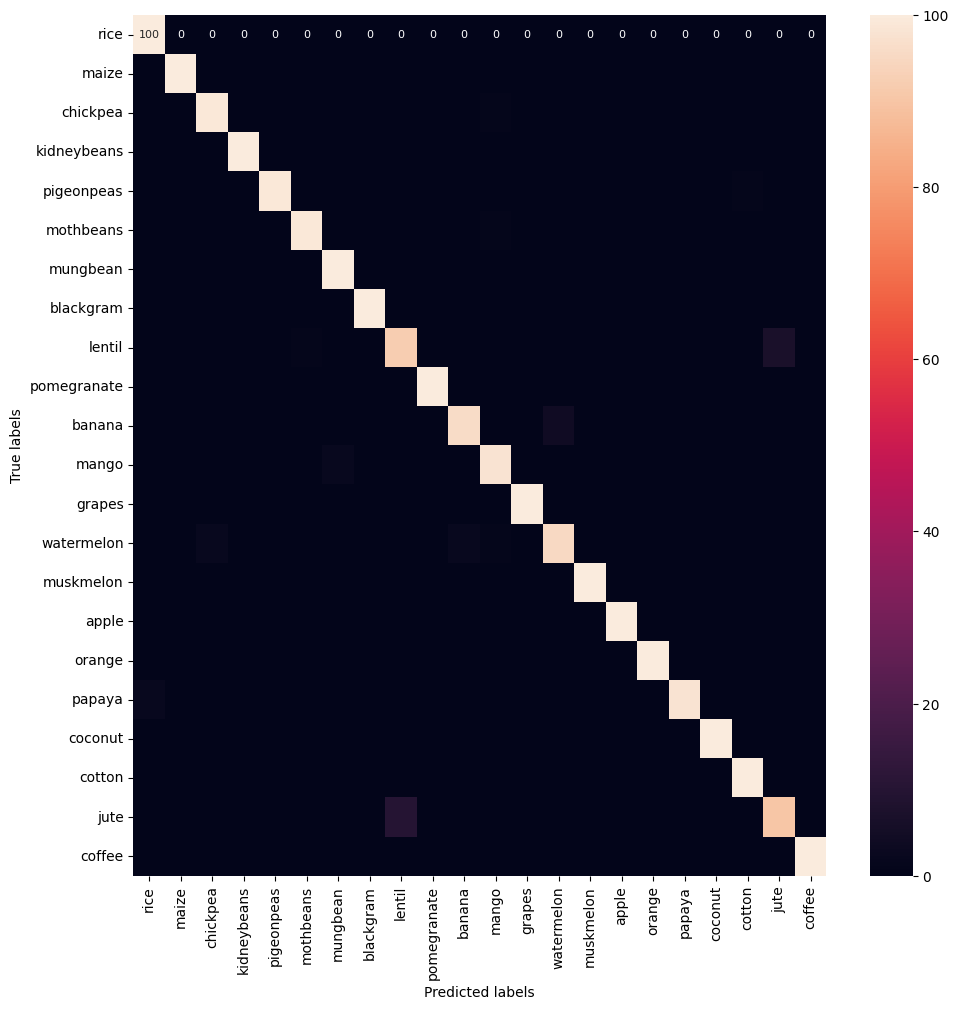

----------------------------------------------------------

-------------------RandomForestClassifier()------------------------


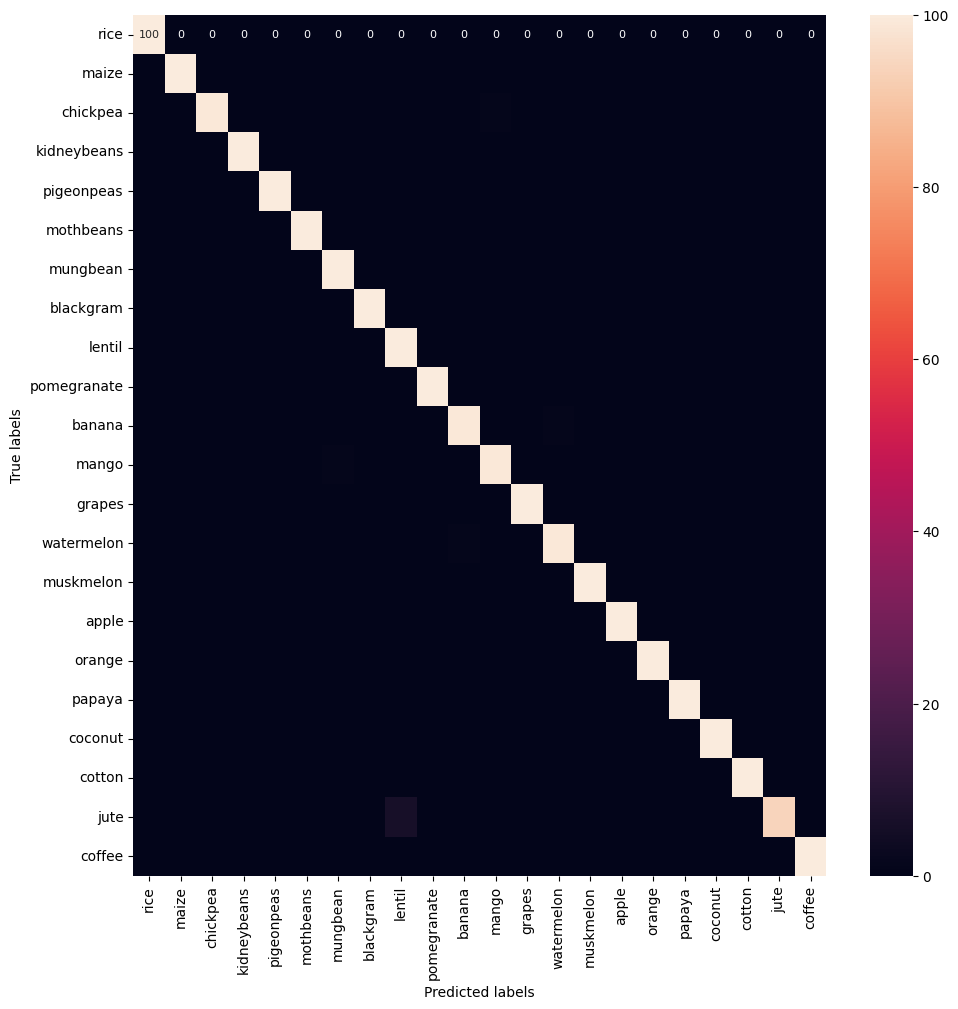

----------------------------------------------------------

-------------------KNeighborsClassifier(n_neighbors=3)------------------------


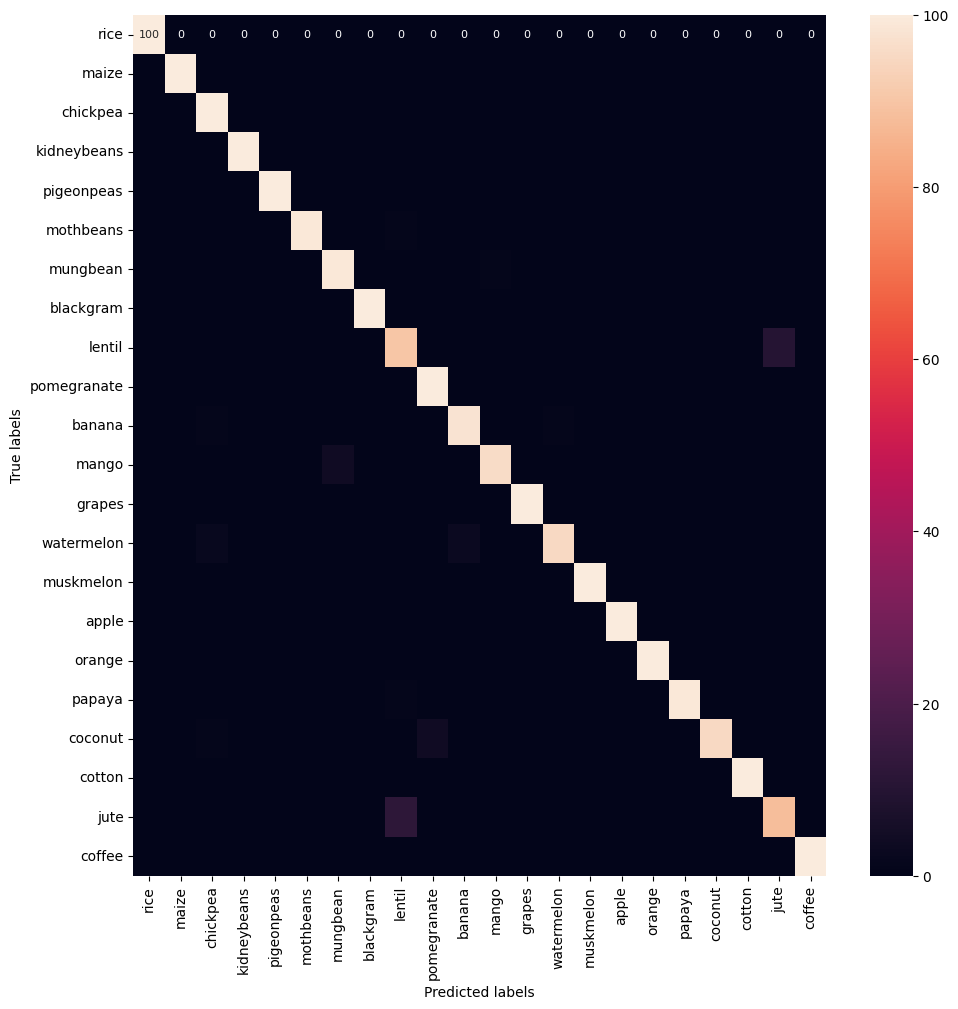

----------------------------------------------------------

-------------------KNeighborsClassifier()------------------------


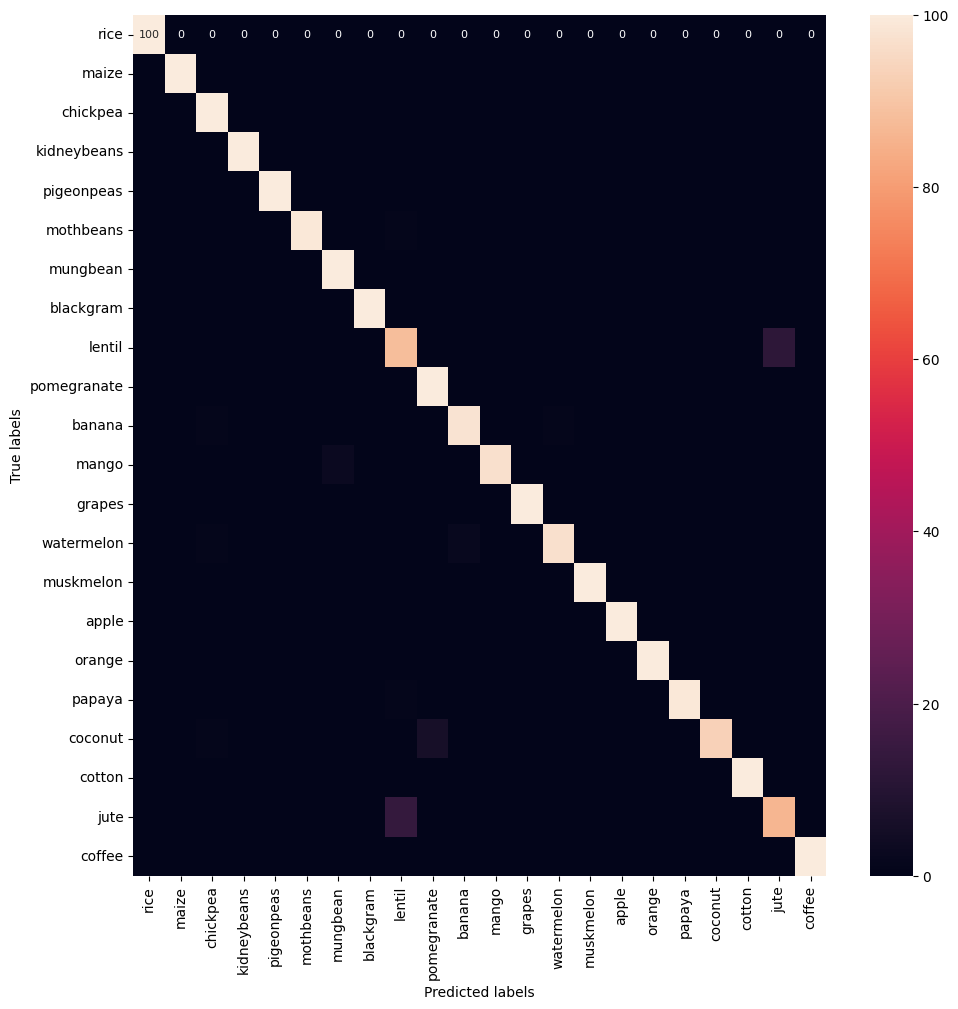

----------------------------------------------------------

-------------------KNeighborsClassifier(n_neighbors=7)------------------------


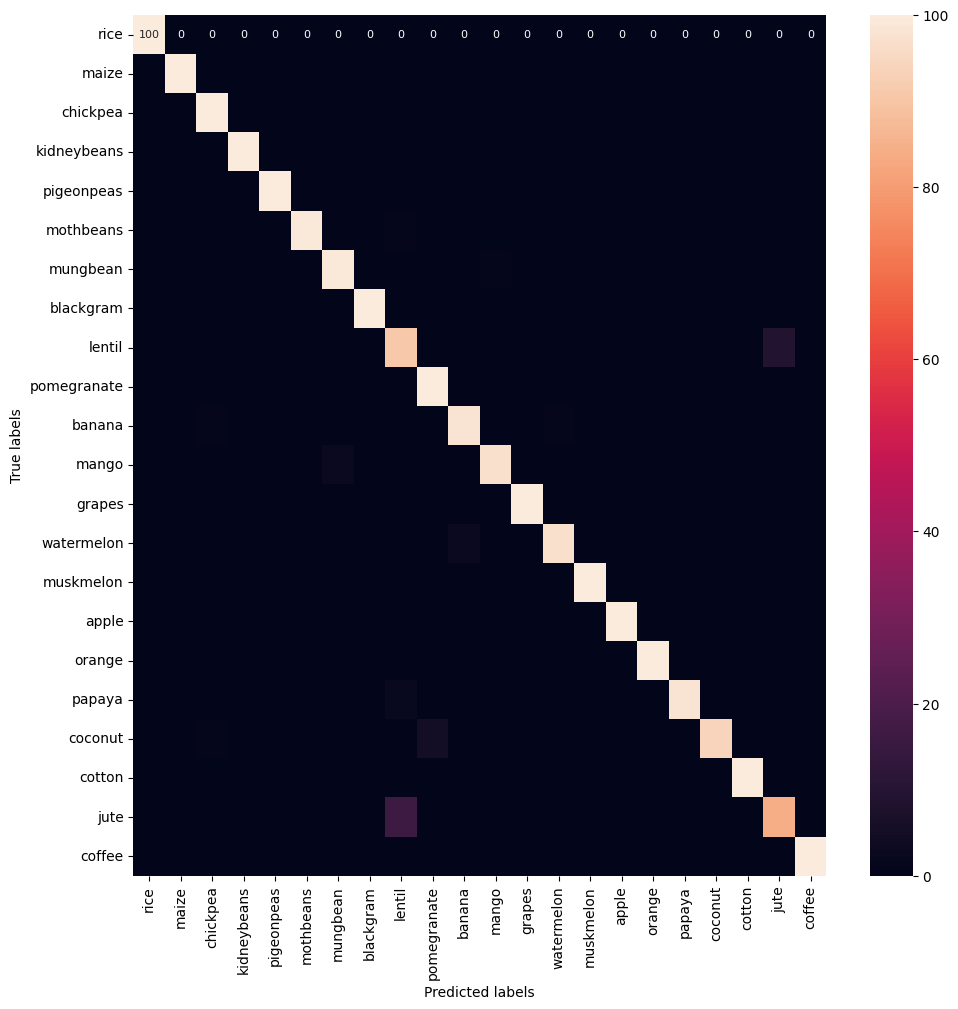

----------------------------------------------------------

-------------------GaussianNB()------------------------


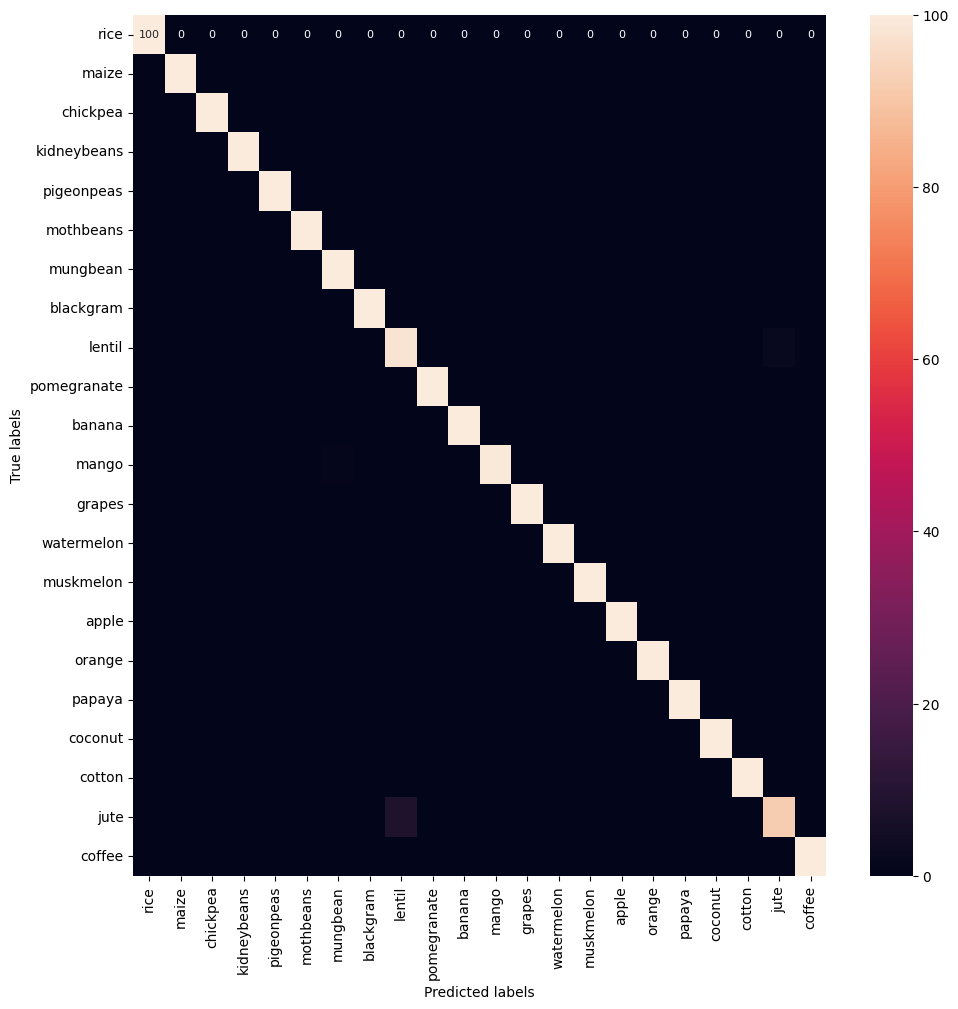

----------------------------------------------------------

-------------------SVC()------------------------


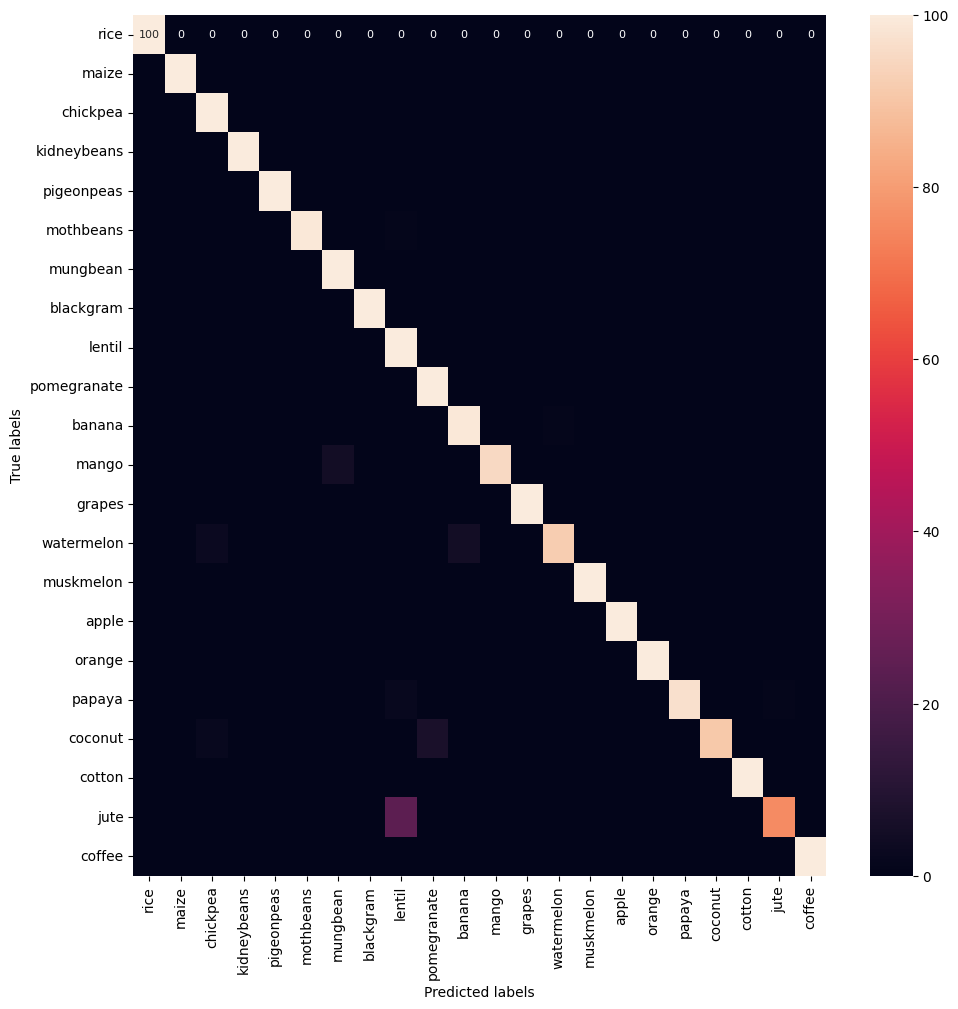

----------------------------------------------------------

-------------------SVC(kernel='linear')------------------------


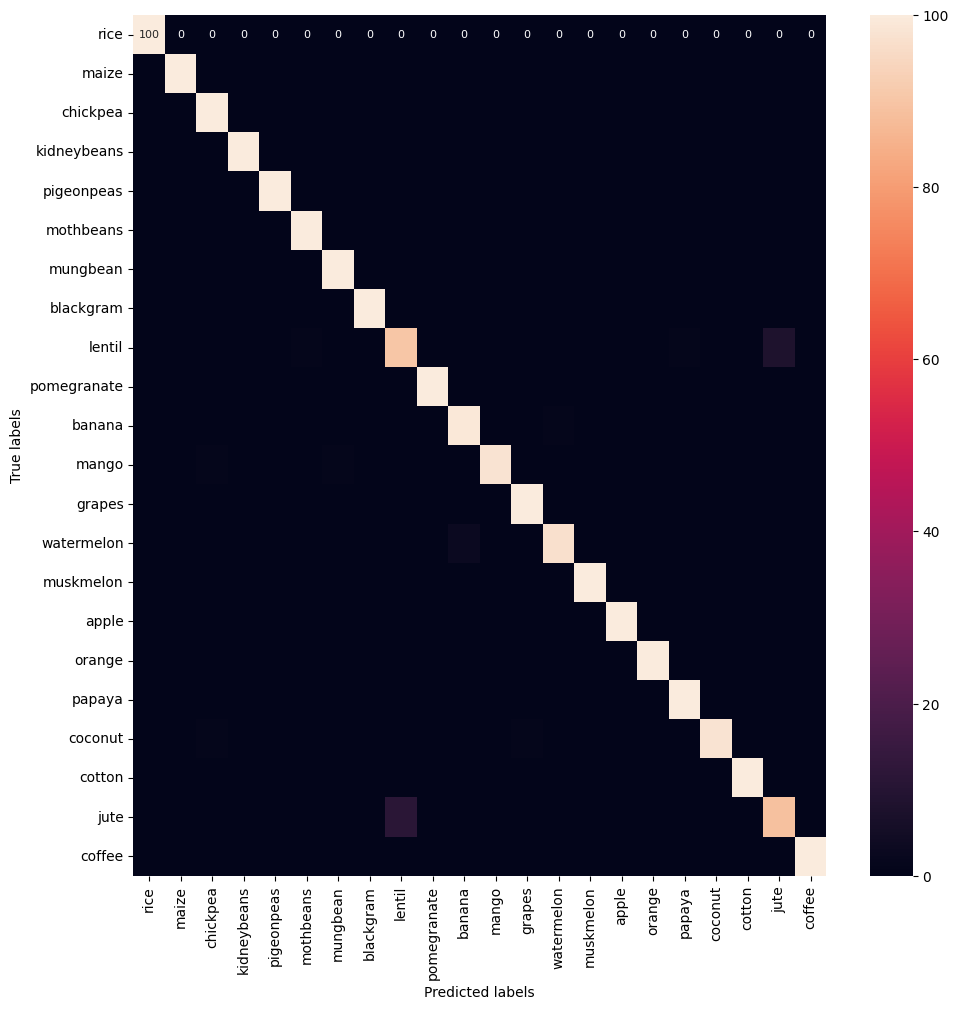

----------------------------------------------------------



In [71]:
for model in models:
    print("-------------------"+str(model)+"------------------------")
    plot_confusion_matrix(model)
    print("----------------------------------------------------------")
    print()

In [72]:
my_model.predict([[15,28,32,28.84270971,99.64328526,6.2185718739999984,224.4016682]])

array(['coconut'], dtype=object)

In [73]:
import pickle

In [74]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))